In [11]:
import import_ipynb
import player as P
import pygame
import sys
import time


In [12]:
def playoff(bot_white,bot_black):
    WIDTH, HEIGHT = 600, 600
    GRID_SIZE = 8
    CELL_SIZE = WIDTH // GRID_SIZE
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 128, 0)
    # Initialize the game board
    board = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
    board[3][4] = board[4][3] = 2  # White
    board[3][3] = board[4][4] = 1  # Black
    # Current player (1 for White, 2 for Black)
   

    flag = 1
    current_player = 2
    while flag:
        
        flag = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if P.is_valid_move(x,y,board,current_player): flag=1

        if current_player == 1 and flag:
            x,y = bot_white.get_move(board,current_player)    
            if P.is_valid_move(x, y,board,current_player):
                P.make_move(x,y,board,current_player)
            current_player = 2
        
        elif current_player == 2 and flag:
            
            grid_x,grid_y = bot_black.get_move(board,current_player)
            if P.is_valid_move(grid_x, grid_y,board,current_player):
                P.make_move(grid_x, grid_y,board,current_player)
                current_player = 1


        if not flag:
            wins = P.decide_winner(board,current_player)
    return wins


In [ ]:
def match(idxWhite,idxBlack):
    global elo
    global players
    E_w = 1/(1 + 10**((elo[idxBlack] - elo[idxWhite])/400))
    E_b = 1/(1 + 10**((elo[idxWhite] - elo[idxBlack])/400))

    blackWin = playoff(bot_white = players[idxWhite],bot_black = players[idxBlack])

    if(blackWin):
        elo[idxBlack] = elo[idxBlack] + 32*(1 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(0 - E_b)
    else:
        elo[idxBlack] = elo[idxBlack] + 32*(0 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(1 - E_b)

In [14]:
import matplotlib.pyplot as plt

In [15]:
mcts3 = P.MCTSPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=3)
pmcts3 = P.MCTSParallelPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=3)

import torch
RLMCTS19 = P.RLMCTSPlayer(timed = True,timeLimit = 1.5)
RLMCTS19.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint19.pth', map_location=torch.device("cpu"),weights_only=True))
alpha = P.AlphaBetaPlayer(depth = 3)
rando = P.RandomPlayer()

players = [mcts3,pmcts3,RLMCTS19,alpha,rando]
elo = [1200 for x in players]


In [16]:
n = len(elo)
print(n)
for x in range(7):
    for i in range(n):
        for j in range(n):
            if i == j : continue
            match(i,j)
            print(".",end="")
    print(elo)

5
....................[1276.0501140851281, 1358.8870536949967, 1193.3729281803257, 1120.0856667747885, 1051.604237264761]
....................[1459.0927336496852, 1493.731344652415, 1185.4003779584343, 1010.2697166122638, 851.5058271272019]
....................[1642.109174723131, 1675.083245920613, 1175.7569292121425, 883.5066118530953, 623.5440382910182]
....................[1797.8481297818857, 1897.402881475953, 1168.6365154180885, 719.4575846680332, 416.6548886560397]
....................[1985.037241040479, 2060.419953886834, 1197.970984392132, 552.3244346578958, 204.2473860226597]
....................[2140.2012150497508, 2288.4789994576963, 1197.0348652274185, 416.94367717948955, -42.65875691435467]
....................[2321.1705522141738, 2491.223265905486, 1196.5618889519385, 284.6113396478193, -293.5670467194174]


<BarContainer object of 5 artists>

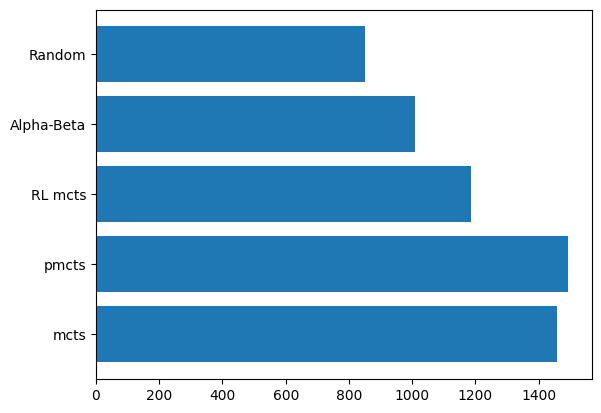

In [18]:
import matplotlib.pyplot as plt
elo = [1459.0927336496852, 1493.731344652415, 1185.4003779584343, 1010.2697166122638, 851.5058271272019]
plt.barh([
     "mcts",
     "pmcts",
     "RL mcts",
     "Alpha-Beta",
     "Random"
     ],elo)